 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [97]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [98]:
# Reading whale returns
whale_returns_data = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [99]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [100]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [101]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [102]:
# Reading algorithmic returns
algo_returns_data = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [103]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [104]:
# Drop nulls
algo_returns = algo_returns.dropna()

In [105]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [106]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [107]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_data, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [108]:
# Check Data Types
sp500_history.dtypes
sp500_history.isnull().sum()

Close    0
dtype: int64

In [109]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"]

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [110]:
sp500_history["Close"] = sp500_history["Close"].astype("float")

In [111]:
sp500_history.dtypes

Close    float64
dtype: object

In [112]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [113]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [114]:
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [115]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={
    "Close": "S&P_500"
})
sp500_returns.head()

,S&P_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [117]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

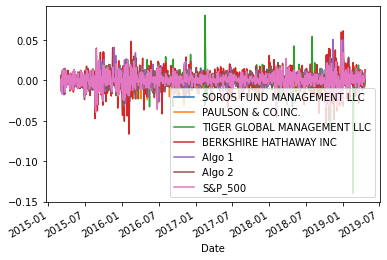

In [118]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

In [119]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


<AxesSubplot:xlabel='Date'>

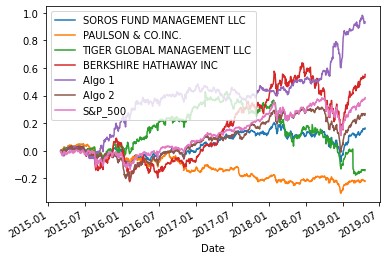

In [120]:
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

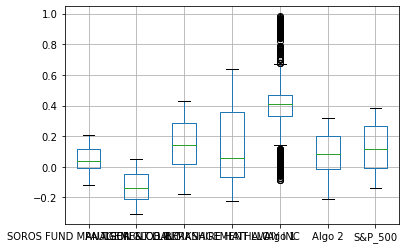

In [121]:
# Box plot to visually show risk
cumulative_returns.boxplot()

### Calculate Standard Deviations

In [122]:
# Calculate the daily standard deviations of all portfolios
# Calculate the daily standard deviation of S&P 500
volatility = cumulative_returns.std()
volatility

SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
Algo 2                         0.131700
S&P_500                        0.144448
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [124]:
# Determine which portfolios are riskier than the S&P 500

# ANSWER: The portfolios that are riskier than the S&P 500 are:

# - Tiger Global Management LLC 
# - Berkshire Hathaway INC 
# - Algo 1

### Calculate the Annualized Standard Deviation

In [125]:
# Calculate the annualized standard deviation (252 trading days)
volatility = cumulative_returns.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
TIGER GLOBAL MANAGEMENT LLC    2.378706
BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
Algo 2                         2.090678
S&P_500                        2.293036
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

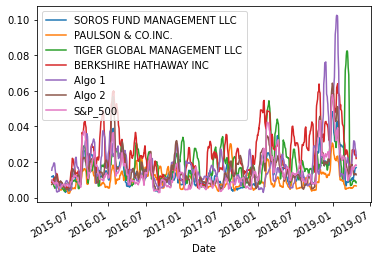

In [126]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
cumulative_returns.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [127]:
# Calculate the correlation
correlation = cumulative_returns.corr()
# Display the correlation matrix 
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
SOROS FUND MANAGEMENT LLC,1.000000,-0.653129,0.327728,0.898896,0.470156,0.915163,0.875512
PAULSON & CO.INC.,-0.653129,1.000000,-0.193595,-0.780559,-0.830635,-0.767196,-0.853201
TIGER GLOBAL MANAGEMENT LLC,0.327728,-0.193595,1.000000,0.031632,0.052669,0.177653,0.131595
BERKSHIRE HATHAWAY INC,0.898896,-0.780559,0.031632,1.000000,0.579663,0.945500,0.938546
Algo 1,0.470156,-0.830635,0.052669,0.579663,1.000000,0.588982,0.740215
Algo 2,0.915163,-0.767196,0.177653,0.945500,0.588982,1.000000,0.965884
S&P_500,0.875512,-0.853201,0.131595,0.938546,0.740215,0.965884,1.000000


<AxesSubplot:>

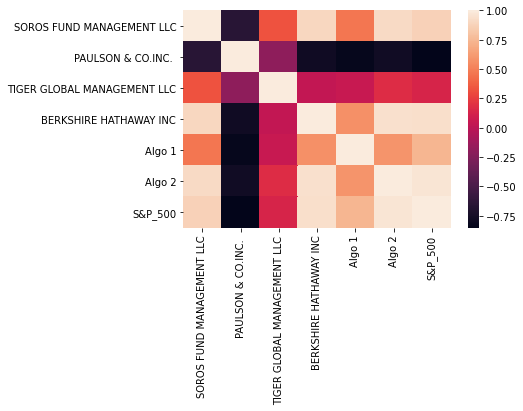

In [128]:
# Display the correlation matrix 
sns.heatmap(correlation)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [129]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns['Algo 2'].cov(cumulative_returns['S&P_500'])
covariance

0.018374787698481544

In [130]:
# Calculate variance of S&P 500
variance = cumulative_returns['S&P_500'].var()
variance

0.020865137941717914

In [131]:
# Computing beta
Algo_2_beta = covariance/variance
Algo_2_beta

0.8806453975913024

<AxesSubplot:title={'center':'Rolling 60-day Beta of Algo 2'}, xlabel='Date'>

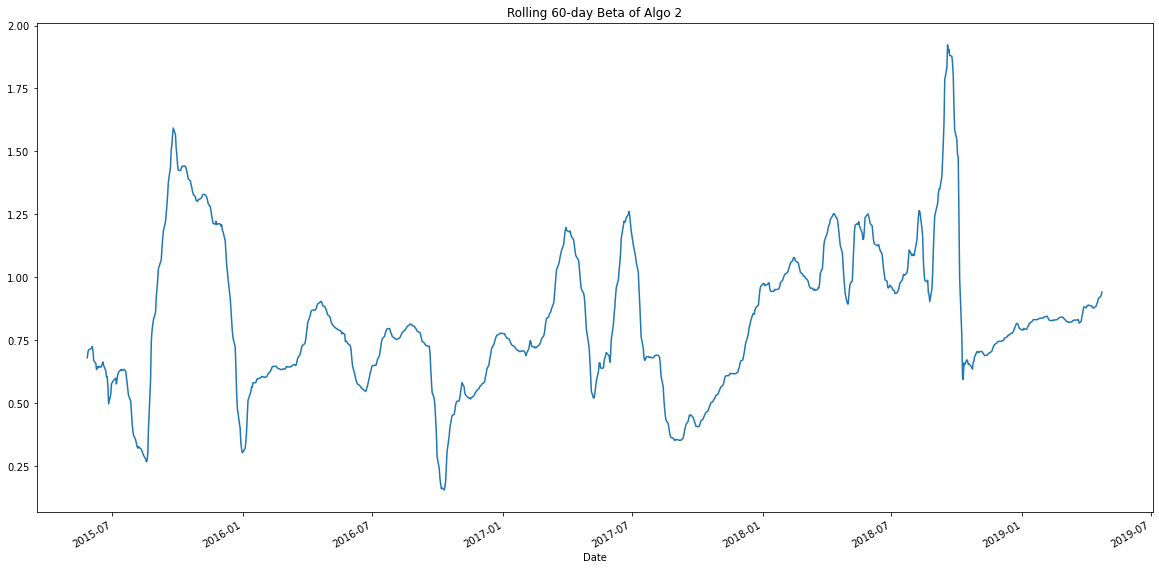

In [132]:
# Plot beta trend
rolling_covariance = cumulative_returns['Algo 2'].rolling(window=60).cov(cumulative_returns['S&P_500'])
rolling_variance = cumulative_returns['Algo 2'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-day Beta of Algo 2')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [35]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [134]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      10.800652
PAULSON & CO.INC.             -22.246513
TIGER GLOBAL MANAGEMENT LLC    15.675541
BERKSHIRE HATHAWAY INC         10.488981
Algo 1                         26.584386
Algo 2                         10.480419
S&P_500                        13.578149
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

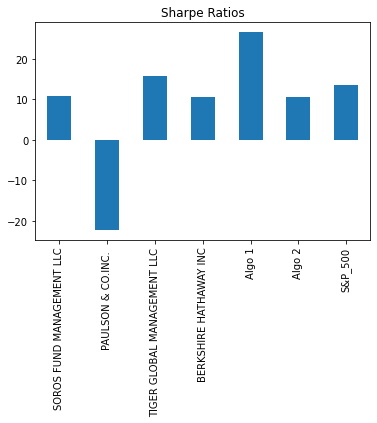

In [219]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on the Sharpe Ratios calculated - we can observe that Algo 1 has outperformed both the S&P 500 and the whale portfolios - however, Algo 2 underperformed when compared to the S&P 500 and performed about as well as Berkshire Hathaway INC and Soros Fund Management LLC. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [174]:
# Reading data from 1st stock
goog_historical_data = Path("goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_historical.sort_index(inplace=True)
goog_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [176]:
# Reading data from 2nd stock
aapl_historical_data = Path("aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_historical.sort_index(inplace=True)
aapl_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [177]:
# Reading data from 3rd stock
cost_historical_data = Path("cost_historical.csv")
cost_historical = pd.read_csv(cost_historical_data, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_historical.sort_index(inplace=True)
cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [178]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([goog_historical, aapl_historical, cost_historical], axis="rows", join="inner")
combined_stocks_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [180]:
# Reset Date index

In [184]:
# Reorganize portfolio data by having a column per symbol
stocks_combined_df = combined_stocks_df.pivot(columns=['Symbol'], values = 'NOCP')
stocks_combined_df.sort_index(inplace=True)
stocks_combined_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [186]:
# Calculate daily returns
combined_returns_df = stocks_combined_df.pct_change()
# Drop NAs
combined_returns = combined_returns_df.dropna()
# Display sample data
combined_returns.sort_index(inplace=True)
combined_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [187]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [193]:
# Join your returns DataFrame to the original returns DataFrame
combined_dff = pd.concat([portfolio_returns, combined_returns], axis="columns", join="inner")
combined_dff = combined_dff.rename(columns={0 : "PORTFOLIO"})
combined_dff.head()

,PORTFOLIO,AAPL,COST,GOOG
Trade DATE,,,,
2018-05-14,0.000015,-0.002333,0.000613,0.001766
2018-05-15,-0.010064,-0.009088,-0.002042,-0.019060
2018-05-16,0.009403,0.009333,0.016523,0.002354
2018-05-17,-0.001595,-0.006324,0.004479,-0.002940
2018-05-18,-0.006061,-0.003637,-0.003206,-0.011339


In [197]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_dff = combined_dff.dropna()
combined_dff.head()

,PORTFOLIO,AAPL,COST,GOOG
Trade DATE,,,,
2018-05-14,0.000015,-0.002333,0.000613,0.001766
2018-05-15,-0.010064,-0.009088,-0.002042,-0.019060
2018-05-16,0.009403,0.009333,0.016523,0.002354
2018-05-17,-0.001595,-0.006324,0.004479,-0.002940
2018-05-18,-0.006061,-0.003637,-0.003206,-0.011339


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [198]:
# Calculate the annualized `std`
annualized_std = combined_dff.std() * np.sqrt(252)
annualized_std

PORTFOLIO    0.210262
AAPL         0.296955
COST         0.209320
GOOG         0.263554
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

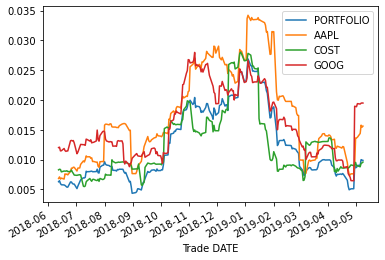

In [199]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
combined_dff.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [209]:
# Calculate and plot the correlation
dff_correlation = combined_dff.corr()
dff_correlation

,PORTFOLIO,AAPL,COST,GOOG
PORTFOLIO,1.000000,0.881676,0.687446,0.853984
AAPL,0.881676,1.000000,0.413546,0.655007
COST,0.687446,0.413546,1.000000,0.385145
GOOG,0.853984,0.655007,0.385145,1.000000


<AxesSubplot:>

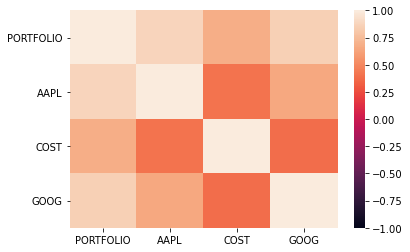

In [212]:
sns.heatmap(dff_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [213]:
# Calculate and plot Beta
#Calculate covariance of Portfolio
dff_covariance = combined_dff['PORTFOLIO'].cov(cumulative_returns['S&P_500'])
dff_covariance

0.00010376683820611841

In [214]:
#Calculate Variance of S&P 500
sp500_variance = cumulative_returns['S&P_500'].var()
sp500_variance

0.020865137941717914

In [215]:
#Compute Beta
portfolio_beta = dff_covariance/sp500_variance
portfolio_beta

0.004973216016877905

<AxesSubplot:title={'center':'Rolling 60-day Beta of PORTFOLIO'}>

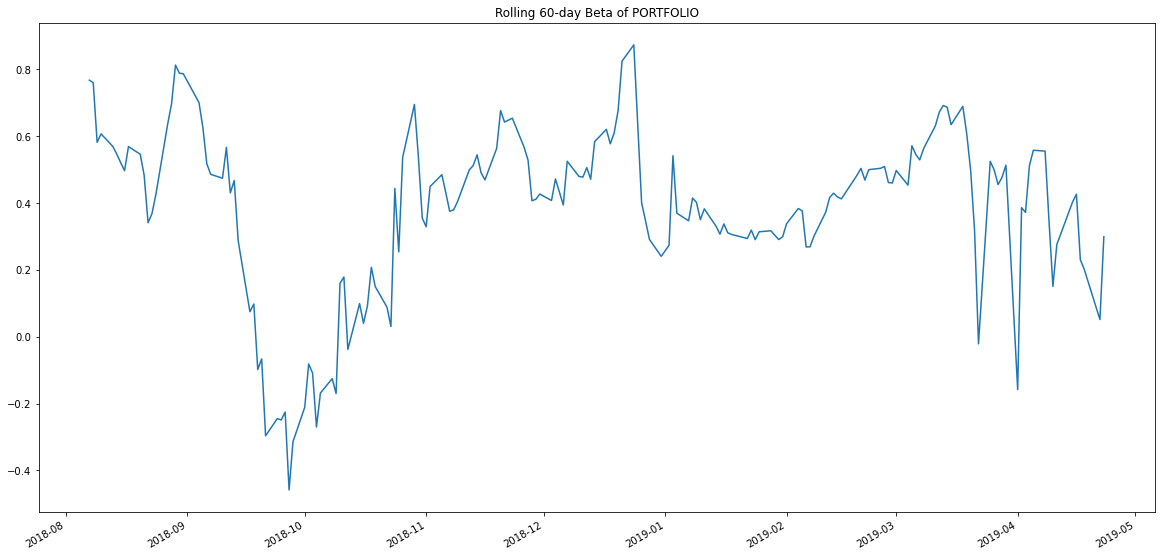

In [216]:
#Plot Beta Trend
rolling_covariance = combined_dff['PORTFOLIO'].rolling(window=60).cov(cumulative_returns['S&P_500'])
rolling_variance = combined_dff['PORTFOLIO'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-day Beta of PORTFOLIO')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [217]:
# Calculate Annualized Sharpe Ratios
portfolio_sharpe_ratio = (combined_dff.mean() * 252) / (combined_dff.std() * np.sqrt(252))
portfolio_sharpe_ratio

PORTFOLIO    0.701280
AAPL         0.361306
COST         1.160482
GOOG         0.349657
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

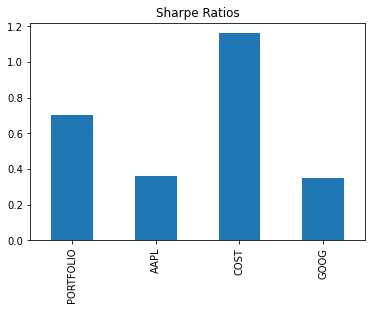

In [220]:
# Visualize the sharpe ratios as a bar plot
portfolio_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
# Based on the Sharpe Ratio - my Portfolio is outperforming both AAPL and GOOG but is underperforming relative to COST.